# Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant term called bias term (also called the intercept term)

## Performance measure

**Root Mean Squared error(RSME)**

It is the most common performance measure of a regression model

**Mean Squared Error (MSE)**

In practice, it is simpler to minimize the MSE than RMSE, and it gives the same result (because the value that minimizes a function also minimizes its square root).

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y_i})^2
$$

m = number of training data points (number of rows)

y_i = target_value

hat{y_i} = predicted value


#### python function to calculate root mean squared error

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import math


def linear(w, b, x):
    return w * x + b


def squared_error(w, b, x, y_real):
    return pow((y_real - linear(w, b, x)), 2)


def rmse(w, b, X_array, Y_array):
    count = len(X_array)
    sum = 0
    for i in range(count):
        sum += squared_error(w, b, X_array[i], Y_array[i])
    mean_squared_error = sum / count
    root_mean_squared_error = math.sqrt(mean_squared_error)

    return root_mean_squared_error


w = 1
b = 2
x = [10, 20]
y = [112, 210]

print(rmse(w, b, x, y))


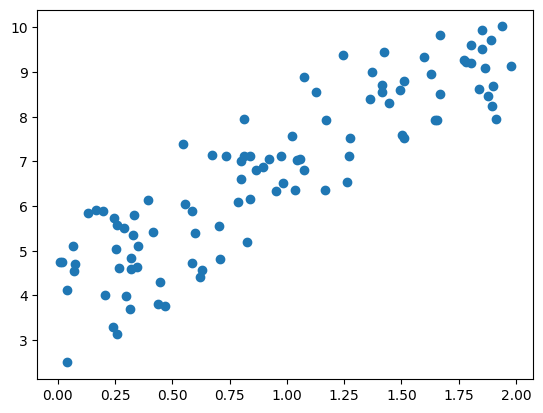

In [31]:
X = 2*np.random.rand(100,1) #rand() produces uniformly distributed values, 
y = 4 + 3*X + np.random.randn(100,1) #randn() produces normally distributed values.
plt.scatter(X,y)

# Normal Equation

This is a mathematical equation that gives the result directly.
$$
\boldsymbol{\hat{\theta}} = (X^T X)^{-1} X^T \mathbf{y}
$$

- θ_hat is the value of θ that minimizes the cost function.
- y is the vector of target values containing y(1) to y(m).

**Time complexity O(n2.4) to O(n3)**

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance ; np.c_ concatinates columns
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

# expectet output: [4,3]

# Scikit learn LinearRegression function
The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”)

**The Singular Value Decomposition (SVD) approach used by Scikit-Learn’s LinearRegression class is about O(n2).**


In [ ]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)



Both the Normal Equation and the SVD approach get very slow when the number of features grows large (e.g., 100,000). On the positive side, both are linear with regards to the number of instan‐ ces in the training set (they are O(m)), so they handle large training sets efficiently, provided they can fit in memory.



# Gradient descent

**linear model**
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

## Core idea

In linear regression, we utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training we measure the cost over all of our training samples $x^{(i)},y^{(i)}$

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

**dividing by 2 so that it gets cancelled when calculating partial derivative**

*gradient descent* is described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.


- x(i) is a column vector of all the feature values of the ith instance in the dataset.
- X is a matrix containing all the feature values (excluding labels) of all instances in the dataset. There is one row per instance and the ith row is equal to the transpose of x(i), noted (x(i))T
- θ is the model’s parameter vector, containing the bias term θ0 and the feature weights θ1 to θn.


# Types of gradient Descent
- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini Batch Gradient Descent

# Batch Gradient Descent

It involves calculations over the full training set X, at each Gradient Descent step. It uses the whole batch of training data at every step

**Cost function**

$$MSE(\theta) = \frac{1}{m} \sum\limits_{i = 1}^{m} (\theta^TX^{(i)} - y^{(i)})^2$$ 
  

**Gradient calculation**

We need to calculate how much the cost function will change if you change θj just a little bit.

$$ \frac{\partial}{\partial \theta_j} \left (MSE(\theta) \right) =  \frac{2}{m} \sum\limits_{i = 1}^{m} (\theta^TX^{(i)} - y^{(i)}) x_j^{(i)}$$

Instead of computing these partial derivatives individually, we can compute them all in one go.

$\nabla_{\theta} MSE(\theta)$ : The gradient vector that contains all the partial derivatives of the cost function

$$\nabla_{\theta} MSE(\theta) =  \frac{2}{m} X^T (X\theta - \mathbf{y})$$

-  predictions = Xθ
-  errors = predictions - y
-  gradient = (1/m) * X.T @ errors

**Gradient descent**

$$\theta = \theta - \eta (\nabla_{\theta} MSE(\theta))$$

$\eta$ = learning rate hyperparameter

**learning rate hyperparameter**

It is the size of the steps. 

- If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time
- If the learning rate is too high, we might jump across the curve and end up on the other side, possibly even higher up than before. This might make the algorithm diverge.

MSE cost function for a Linear Regression model happens to be a convex function, This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly.

In [39]:
#Adding a bias term with the input features. The bellow code adds a column of '1' with all training row.
X_b = np.c_[np.ones((100,1)), X]

# random initialization
weights = np.random.randn(2,1)


In [33]:
def gradient_descent(X_b, y, weights, learning_rate, iterations):
    # Number of training examples
    m = X_b.shape[0]
    #y = y.reshape(X_b.shape[0]) # as shape of y is (100,1) but we need shape (100,)
    
    for i in range(iterations):
        gradient = (2/m) * (X_b.T.dot(X_b.dot(weights) - y))
        weights -= (learning_rate * gradient)
        
    return weights

In [40]:
w = gradient_descent(X_b,y,weights,0.01,10000)
print(w)

[[4.14768035]
 [2.77339592]]


# Stochastic Gradient Descent

Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance.

**Epoch**

By convention we iterate by rounds of m iterations; each round is called an epoch. (when complete one full iteration over m, it is considerd as 1 epoch)

SGD can be implemented as an out-of-core algorithm. 

**learning schedule**

The function that determines the learning rate at each iteration is called the learning schedule.
It gradually reduces the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.



In [41]:
n_epochs = 50
t0, t1 = 5, 50
m = X.shape[0]
def learning_schedule(t):
    return t0/(t + t1)
    
weights = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = xi.T.dot(xi.dot(weights)-yi)
        learning_rate = learning_schedule(epoch*m + i)
        weights -= learning_rate*gradients

print(weights)

[[4.17873479]
 [2.77744133]]


## Stochastic gradient descent using scikit learn (SGDRegressor)

- It defaults to optimizing the squared error cost function.

In [48]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)  
sgd_reg.fit(X, y.ravel())

# runs for maximum 1000 epochs
# (max_iter=1000) or until the loss drops by less than 1e-3 during one epoch (tol=1e-3), 
# starting with a learning rate of 0.1 (eta0=0.1), 
# using the default learning schedule (different from the preceding one), and it does not use any regularization (penalty=None)

SGDRegressor(eta0=0.1, penalty=None)

In [49]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.12918339]), array([2.75933336]))

# Mini-batch gradient descent

Mini- batch GD computes the gradients on small random sets of instances called mini- batches. 

The main advantage of Mini-batch GD over Stochastic GD is that we can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

Stochastic GD and Mini-batch GD would also reach the minimum if we used a good learning schedule.
